In [2]:
#load dataset and preprocessing
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
dataTrain = pd.read_csv("Train.csv") 
dataTest = pd.read_csv("Test.csv") 


dataTrain.Var_1.fillna('Cat_10', inplace=True)
dataTrain.Var_1 = dataTrain['Var_1'].apply(lambda x:int(str(x).split('_')[1]))

dataTest.Var_1.fillna('Cat_10', inplace=True)
dataTest.Var_1 = dataTest['Var_1'].apply(lambda x:int(str(x).split('_')[1]))
# dataTrain["Ever_Married"].fillna("x" , inplace =True)
# dataTrain["Graduated"].fillna("x" , inplace =True)
# dataTrain["Profession"].fillna("x" , inplace =True)
# dataTrain["Work_Experience"].fillna(dataTrain["Work_Experience"].mean() , inplace =True)
# dataTrain["Family_Size"].fillna(dataTrain["Family_Size"].mean() , inplace =True)
# dataTrain["Var_1"].fillna("Cat_10" , inplace =True)


dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            8068 non-null   int64  
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 693.5+ KB


In [3]:
Profession = {
    'Healthcare':0,
    'Engineer':1,
    'Lawyer':2,
    'Entertainment':3,
    'Artist':4,
    'Executive':5,
    'Doctor':6,
    'Homemaker':7,
    'Marketing':8,
    np.nan:10
}
Gender = {
    'Male':0,
    'Female':1,
    np.nan:10
}
Ever_Married = {
    'Yes':0,
    'No':1,
    np.nan:10
}
Graduated = {
    'Yes':0,
    'No':1,
    np.nan:10
}
Spending_Score = {
    'Low':0,
    'Average':1,
    'High':2,
    np.nan:10
}
to_change = [Gender, Ever_Married, Graduated, Spending_Score, Profession] 

for i in to_change:
    dataTrain = dataTrain.replace(i)
    dataTest = dataTest.replace(i)
  

In [4]:
dataTrain.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [5]:
dataTrain.dtypes

ID                   int64
Gender               int64
Ever_Married         int64
Age                  int64
Graduated            int64
Profession           int64
Work_Experience    float64
Spending_Score       int64
Family_Size        float64
Var_1                int64
Segmentation        object
dtype: object

In [6]:
df = dataTrain['Var_1'].values
gg = []
for x in df:
    if x not in gg:
        gg.append(x)
        
        
print(gg)

[4, 6, 7, 3, 1, 2, 10, 5]


In [7]:
# dataTrain["Profession"] = dataTrain["Profession"].map({'Healthcare':1,'Engineer':2,'Lawyer':3,'Entertainment':4,'Artist':5,'Executive' : 6,'Doctor':7,'Homemaker':8,'Marketing':9,'x' : 10})
# dataTrain["Ever_Married"] = dataTrain["Ever_Married"].map({'Yes':1,'No':2,'x' : 10})
# dataTrain["Gender"] = dataTrain["Gender"].map({'Female':1,'Male':2})
# dataTrain["Graduated"] = dataTrain["Graduated"].map({'Yes':1,'No':2,'x' : 10})
# dataTrain["Spending_Score"] = dataTrain["Spending_Score"].map({'Low':1,'Average':2,'High':3})
# dataTrain["Segmentation"] = dataTrain["Segmentation"].map({'A':1,'B':2,'C':3,'D':4})
train_target = dataTrain['Segmentation']
train = dataTrain.drop(['Segmentation'], axis=1)
# dataTrain["Var_1"] = dataTrain["Var_1"].map({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7,'Cat_10':10})
# dataTrain

In [8]:
train = train.replace({10:np.nan})
dataTest = dataTest.replace({10:np.nan})

In [9]:
from fancyimpute import KNN
train = pd.DataFrame(KNN(k = 3).fit_transform(train), columns = dataTest.columns)
dataTest = pd.DataFrame(KNN(k = 3).fit_transform(dataTest), columns = dataTest.columns)

Imputing row 1/8068 with 0 missing, elapsed time: 9.393
Imputing row 101/8068 with 0 missing, elapsed time: 9.394
Imputing row 201/8068 with 0 missing, elapsed time: 9.396
Imputing row 301/8068 with 1 missing, elapsed time: 9.398
Imputing row 401/8068 with 0 missing, elapsed time: 9.399
Imputing row 501/8068 with 0 missing, elapsed time: 9.401
Imputing row 601/8068 with 0 missing, elapsed time: 9.402
Imputing row 701/8068 with 0 missing, elapsed time: 9.404
Imputing row 801/8068 with 0 missing, elapsed time: 9.406
Imputing row 901/8068 with 0 missing, elapsed time: 9.407
Imputing row 1001/8068 with 0 missing, elapsed time: 9.409
Imputing row 1101/8068 with 0 missing, elapsed time: 9.411
Imputing row 1201/8068 with 0 missing, elapsed time: 9.412
Imputing row 1301/8068 with 0 missing, elapsed time: 9.413
Imputing row 1401/8068 with 1 missing, elapsed time: 9.415
Imputing row 1501/8068 with 0 missing, elapsed time: 9.416
Imputing row 1601/8068 with 1 missing, elapsed time: 9.417
Imputing 

In [10]:
setvalues = []
getValues = dataTrain["Age"].values
for age in getValues:
    if age <= 18:
        setvalues.append("teen")
    elif age > 18 and age <= 26:
        setvalues.append("young")
    elif age > 26 and age <= 50 :
        setvalues.append("eldery")
    elif age >50 :
        setvalues.append("aged")
dataTrain["Age"] = setvalues       
print(dataTrain["Age"].values)

dataTrain["Age"] = dataTrain["Age"].map({"teen" : 0 , "young" : 1 , "eldery" : 2 , "aged" : 3})

['young' 'eldery' 'aged' ... 'eldery' 'eldery' 'eldery']


In [11]:
#vizualization
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt

#with the augmentation of family size the more they regrouped into the D category 

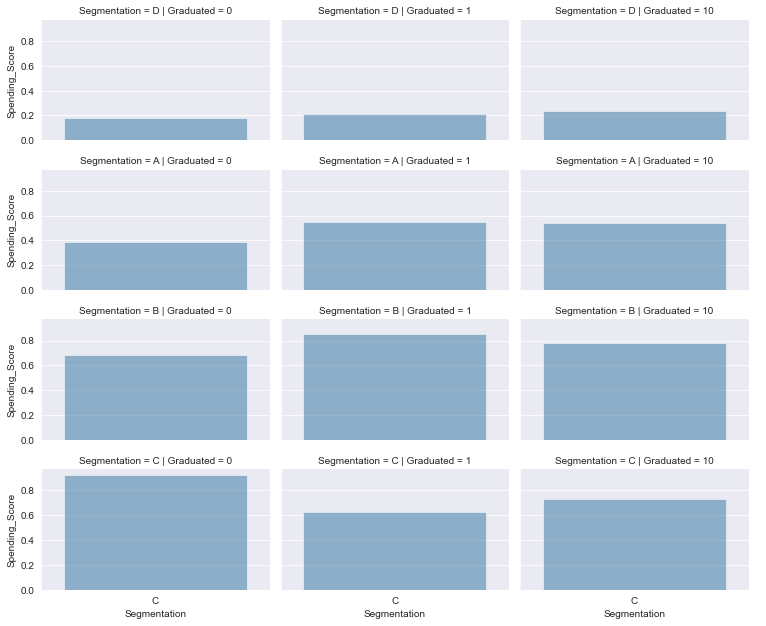

In [12]:
grid = sns.FacetGrid(dataTrain, row="Segmentation", col="Graduated", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Segmentation", 'Spending_Score', alpha=.5, ci=None)
grid.add_legend()

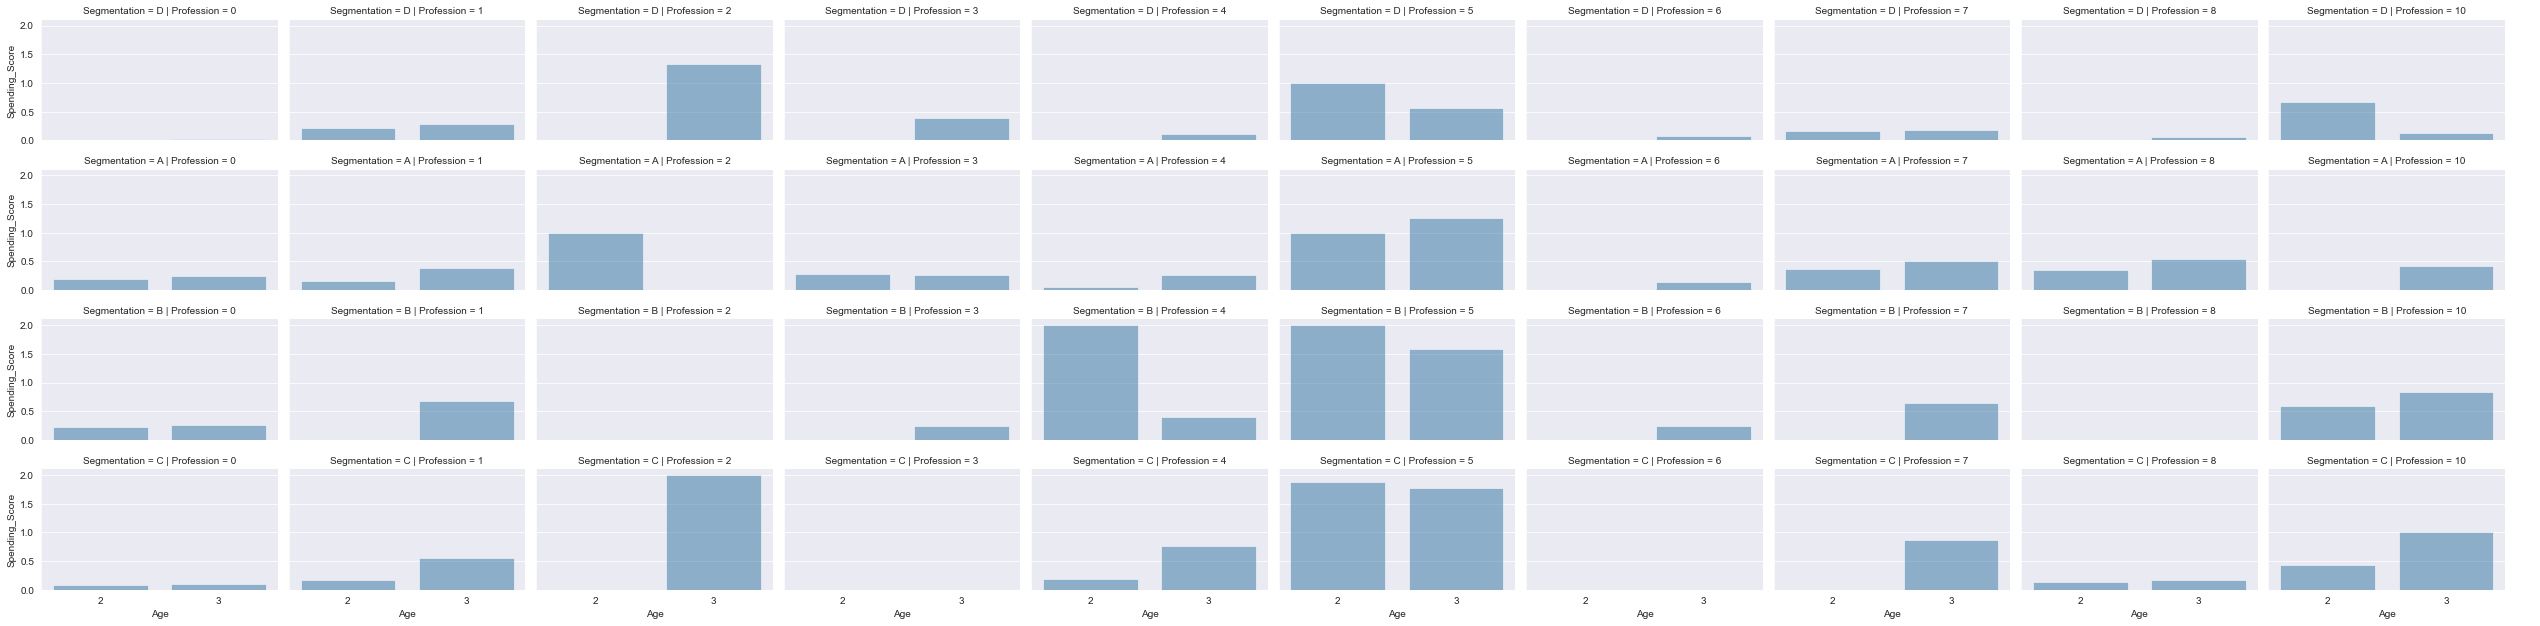

In [13]:
grid = sns.FacetGrid(dataTrain, row="Segmentation", col="Profession", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Age", 'Spending_Score', alpha=.5, ci=None)
grid.add_legend()

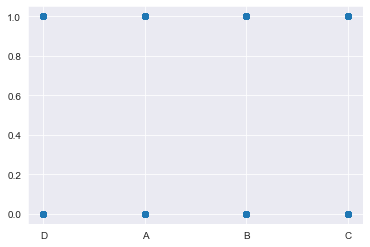

In [14]:
x=dataTrain["Segmentation"]
y=dataTrain["Gender"]
plt.scatter(x, y)
plt.show()

In [30]:
train = train.iloc[:,1:10].copy
train

<bound method NDFrame.copy of       Gender  Ever_Married   Age  Graduated  Profession  Work_Experience  \
0        0.0           1.0  22.0        1.0         0.0         1.000000   
1        1.0           0.0  38.0        0.0         1.0         4.759221   
2        1.0           0.0  67.0        0.0         1.0         1.000000   
3        0.0           0.0  67.0        0.0         2.0         0.000000   
4        1.0           0.0  40.0        0.0         3.0         3.691166   
...      ...           ...   ...        ...         ...              ...   
8063     0.0           1.0  22.0        1.0         0.0         0.000000   
8064     0.0           1.0  35.0        1.0         5.0         3.000000   
8065     1.0           1.0  33.0        0.0         0.0         1.000000   
8066     1.0           1.0  27.0        0.0         0.0         1.000000   
8067     0.0           0.0  37.0        0.0         5.0         0.000000   

      Spending_Score  Family_Size  Var_1  
0             

In [15]:
x = train
y = dataTrain.iloc[:,10].copy()
y

0       D
1       A
2       B
3       B
4       A
       ..
8063    D
8064    D
8065    D
8066    B
8067    B
Name: Segmentation, Length: 8068, dtype: object

In [31]:
x

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809.0,0.0,1.0,22.0,1.0,0.0,1.000000,0.0,4.0,4.0
1,462643.0,1.0,0.0,38.0,0.0,1.0,4.759221,1.0,3.0,4.0
2,466315.0,1.0,0.0,67.0,0.0,1.0,1.000000,0.0,1.0,6.0
3,461735.0,0.0,0.0,67.0,0.0,2.0,0.000000,2.0,2.0,6.0
4,462669.0,1.0,0.0,40.0,0.0,3.0,3.691166,2.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...
8063,464018.0,0.0,1.0,22.0,1.0,0.0,0.000000,0.0,7.0,1.0
8064,464685.0,0.0,1.0,35.0,1.0,5.0,3.000000,0.0,4.0,4.0
8065,465406.0,1.0,1.0,33.0,0.0,0.0,1.000000,0.0,1.0,6.0
8066,467299.0,1.0,1.0,27.0,0.0,0.0,1.000000,0.0,4.0,6.0


In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
model.fit(X_train, y_train)
print(model)

[13:15:37] WARNING: ..\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=500, n_jobs=1, nthread=1, num_para

In [23]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.83%


In [19]:
#predict Segmentation  using kmeans 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores =[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i) 
    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    print(f'for {i} to Acuuracy=',accuracy_score(y_pred,y_test))
    scores.append(round(accuracy_score(y_pred,y_test),2))


for 1 to Acuuracy= 0.42688971499380424
for 2 to Acuuracy= 0.3748451053283767
for 3 to Acuuracy= 0.42874845105328374
for 4 to Acuuracy= 0.42131350681536556
for 5 to Acuuracy= 0.4250309789343247
for 6 to Acuuracy= 0.419454770755886
for 7 to Acuuracy= 0.41759603469640644
for 8 to Acuuracy= 0.4157372986369269
for 9 to Acuuracy= 0.4114002478314746
for 10 to Acuuracy= 0.40892193308550184
for 11 to Acuuracy= 0.4070631970260223
for 12 to Acuuracy= 0.40954151177199505
for 13 to Acuuracy= 0.41016109045848825
for 14 to Acuuracy= 0.4045848822800496
for 15 to Acuuracy= 0.39838909541511774
for 16 to Acuuracy= 0.4052044609665427
for 17 to Acuuracy= 0.4021065675340768
for 18 to Acuuracy= 0.4021065675340768
for 19 to Acuuracy= 0.40644361833952913
for 20 to Acuuracy= 0.40396530359355637
for 21 to Acuuracy= 0.40892193308550184
for 22 to Acuuracy= 0.40024783147459725
for 23 to Acuuracy= 0.40954151177199505
for 24 to Acuuracy= 0.40644361833952913
for 25 to Acuuracy= 0.395910780669145
for 26 to Acuuracy= 0.

In [20]:
# predict Rating by product line and gender using decission tree
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=20)
treeModel = DecisionTreeClassifier()  
treeModel.fit(x_train, y_train)   #fitting our model
y_pred=treeModel.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.4547707558859975


In [21]:
from sklearn.ensemble import RandomForestClassifier


x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y, test_size=0.20,random_state=20)
clf=RandomForestClassifier(n_estimators=1000)  
clf.fit(x_train2, y_train2)  
y_pred2=clf.predict(x_test2)  
print("Accuracy:", accuracy_score(y_test2, y_pred2))

Accuracy: 0.5161090458488228


In [27]:
dataTest

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989.0,1.0,0.0,36.0,0.0,1.000000,0.000000,0.0,1.0,6.0
1,458994.0,0.0,0.0,37.0,0.0,0.000000,8.000000,1.0,4.0,6.0
2,458996.0,1.0,0.0,69.0,1.0,5.644809,0.000000,0.0,1.0,6.0
3,459000.0,0.0,0.0,59.0,1.0,5.000000,11.000000,2.0,2.0,6.0
4,459001.0,1.0,1.0,19.0,1.0,8.000000,0.000000,0.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...
2622,467954.0,0.0,1.0,29.0,1.0,0.000000,9.000000,0.0,4.0,6.0
2623,467958.0,1.0,1.0,35.0,0.0,6.000000,1.000000,0.0,1.0,6.0
2624,467960.0,1.0,1.0,53.0,0.0,3.000000,2.668753,0.0,2.0,6.0
2625,467961.0,0.0,0.0,47.0,0.0,5.000000,1.000000,2.0,5.0,4.0


In [32]:
#submission
pred = model.predict(dataTest[['ID','Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1']])
submission = pd.DataFrame(pred)

dic_lists = {'ID':dataTest['ID'],'Segmentation':pred}
submission = pd.DataFrame(dic_lists)
submission

,ID,Segmentation
0,458989.0,A
1,458994.0,C
2,458996.0,D
3,459000.0,C
4,459001.0,D
...,...,...
2622,467954.0,D
2623,467958.0,A
2624,467960.0,A
2625,467961.0,B


In [ ]:
submission.to_csv('eighth.csv',index=False)